In [ ]:
# !pip install roboflow
# from roboflow import Roboflow
# rf = Roboflow(api_key="QnnzsdXPEsvcmyZQsec6")
# project = rf.workspace("ws-qwbuh").project("constellation-dsphi")
# version = project.version(1)
# dataset = version.download("yolov11")

  Using cached idna-3.7-py3-none-any.whl.metadata (9.9 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached idna-3.7-py3-none-any.whl (66 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 MB 2.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 2.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 2.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 2.6 MB/s eta 0:00:00a 0:00:01
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 2.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 2.3 MB/s eta 0:00:00a 0:00:01
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━


Extracting Dataset Version Zip to Constellation-1 in yolov11:: 100%|██████████| 4700/4700 [00:00<00:00, 8208.78it/s]


In [6]:
# !pip install ultralytics
# !pip install seaborn
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random

In [16]:
dataset_path = "Constellation-1"

train_path = dataset_path + "/train"
valid_path = dataset_path + "/valid"
test_path = dataset_path + "/test"

train_imgs = train_path + "/images"
valid_imgs = valid_path + "/images"
test_imgs = test_path + "/images"

train_labels = train_path + "/labels"
valid_labels = valid_path + "/labels"
test_labels = test_path + "/labels"

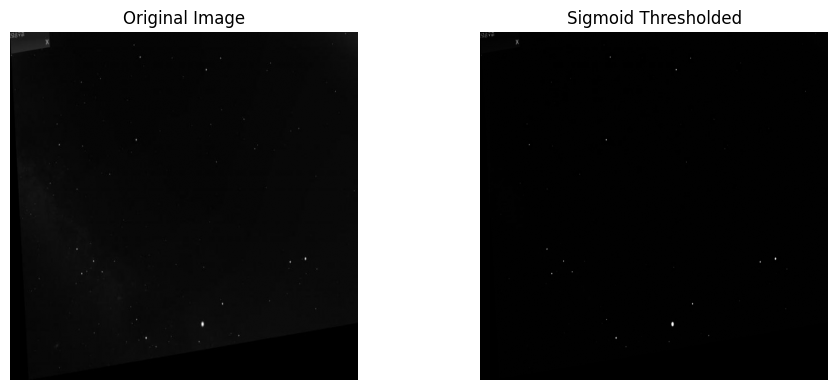

Constellation-1/train/images/2022-11-26-00-00-00-n_png_jpg.rf.ccc74f2d10f471030d8dcb2cf71d89b8.jpg


In [ ]:
# Get a random image from the train folder
image_files = [f for f in os.listdir(train_imgs) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
if not image_files:
    raise ValueError("No image files found in the training directory.")
random_image_file = random.choice(image_files)
image_path = os.path.join(train_imgs, random_image_file)

# Load image in grayscale
original = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply sigmoid contrast enhancement
# You can tweak gain and cutoff to control the steepness and center of the curve
def sigmoid_contrast(img, gain=10, cutoff=128):
    img = img.astype(np.float32)
    sigmoid = 255 / (1 + np.exp(-gain * (img - cutoff) / 255.0))
    return np.uint8(sigmoid)

transformed = sigmoid_contrast(original)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(original, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Sigmoid Thresholded")
plt.imshow(transformed, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

print(image_path)